In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

/home/sreyan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/sreyan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
def sigmoid(x):
    return 1/1+(np.exp(-x))

In [30]:
def compute_cost(X,y,theta):
    m=len(y)
    h=sigmoid(X @ theta)
    epsilon=1e-8
    cost=(1/m)*(((-y).T @ np.log(h+epsilon))-((1-y).T @ np.log(1-h+epsilon)))
    return cost

In [31]:
def gradient_descent(X,y,params,learning_rate,iterations):
    m=len(y)
    cost_history=np.zeros((iterations,1))
    
    for i in range(iterations):
        params=params - (learning_rate/m)*(X.T @ (sigmoid(X @ params) -y))
        cost_history[i] = compute_cost(X,y,params)
        
    return (cost_history, params)

In [32]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

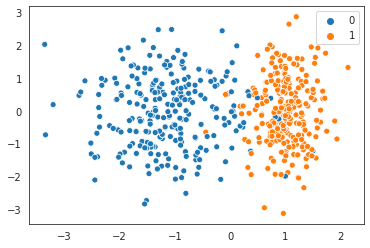

In [33]:
X,y=make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=14)
y=y[:,np.newaxis]
sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1))

/home/sreyan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


Initial cost is: [[nan]] 

Optimal parameters are: 
 [[-0.24676907]
 [ 0.10867289]
 [ 0.01148611]] 



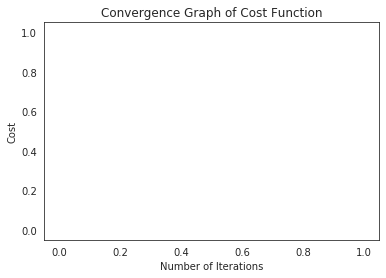

In [34]:
m=len(y)
X=np.hstack((np.ones((m,1)),X))
n=np.size(X,1)
params=np.zeros((n,1))

iterarions=1500
learning_rate=0.0001

initial_cost=compute_cost(X,y,params)
print("Initial cost is: {} \n".format(initial_cost))

(cost_history, params_optimal)=gradient_descent(X,y,params,learning_rate,iterarions)

print("Optimal parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()